In [4]:
%load_ext autoreload
%autoreload 2
from kmodes.tests.test_kprototypes_missing import read_test_data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-2.998898462740384, 7.081598371037137, -2.319023275719898, 10.479535661769306)

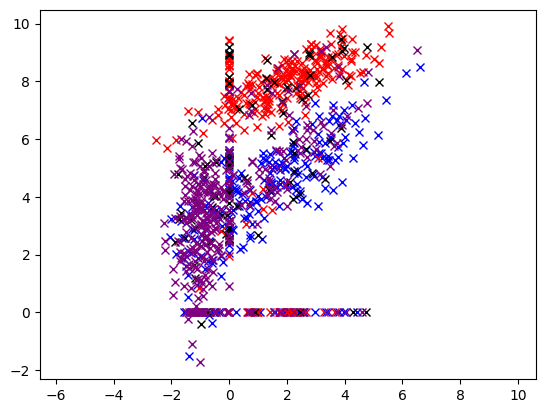

In [6]:
p=50
X = pd.DataFrame(read_test_data(0.9))
X[0] = X[0].map(lambda v: 0 if np.isnan(v) else v)
X[1] = X[1].map(lambda v: 0 if np.isnan(v) else v)
X[2] = X[2].map(lambda v: 'black' if pd.isnull(v) else v)
#X.head()
Xblue = X.loc[X[2] == 'blue']
Xblack = X.loc[X[2] == 'black']
Xpurple = X.loc[X[2] == 'purple']
Xred = X.loc[X[2] == 'red']
plt.plot(Xblue[0], Xblue[1], 'x', color='blue')
plt.plot(Xred[0], Xred[1], 'x', color='red')
plt.plot(Xblack[0], Xblack[1], 'x', color='black')
plt.plot(Xpurple[0], Xpurple[1], 'x', color='purple')
plt.axis('equal')